# Exploratory Data Analysis (EDA): London Bike Sharing Dataset

This notebook explores the dataset to gain insights about factors influencing bike rentals in London. 


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../data/london_merged.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
# Dataset overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (17414, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB

Missing values:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


# Basic Statistics

In [4]:
# Descriptive statistics
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


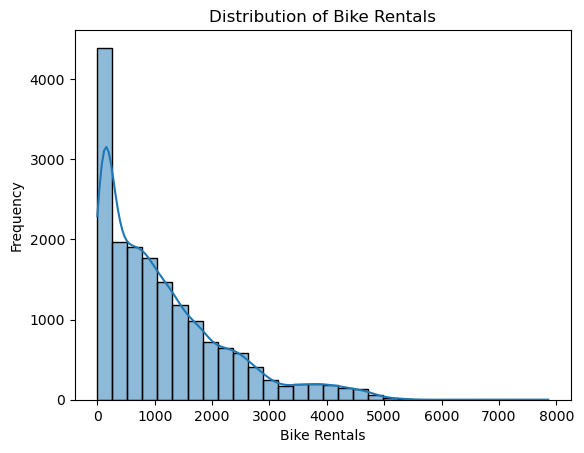

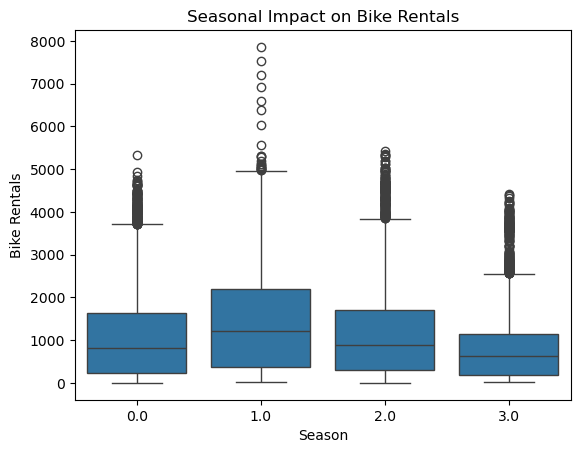

In [5]:
# Distribution of bike rentals
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.xlabel("Bike Rentals")
plt.ylabel("Frequency")
plt.show()

# Seasonal impact on rentals
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Seasonal Impact on Bike Rentals")
plt.xlabel("Season")
plt.ylabel("Bike Rentals")
plt.show()

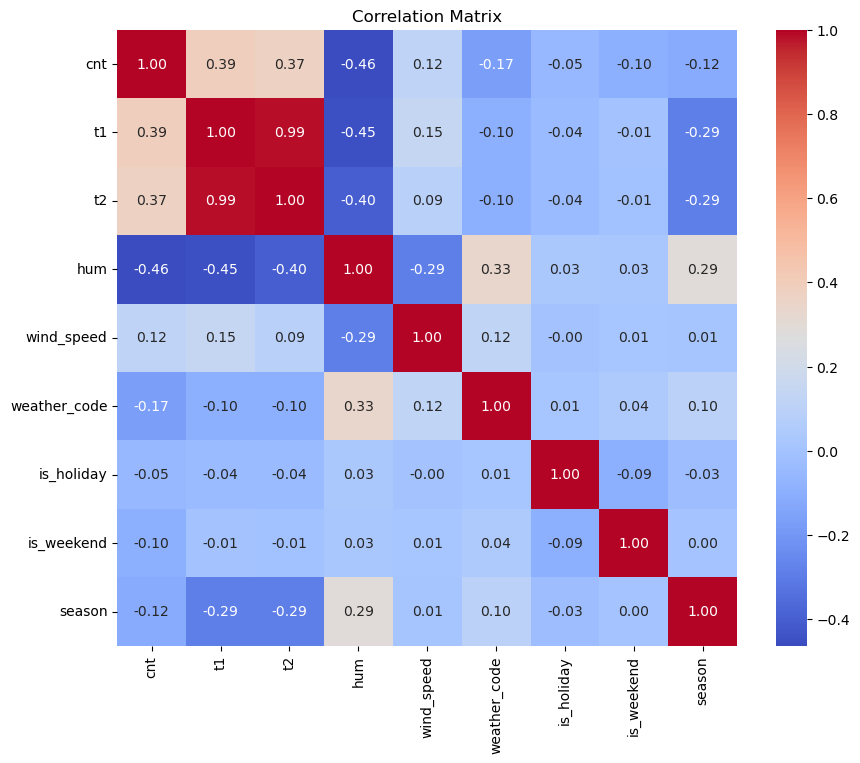

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


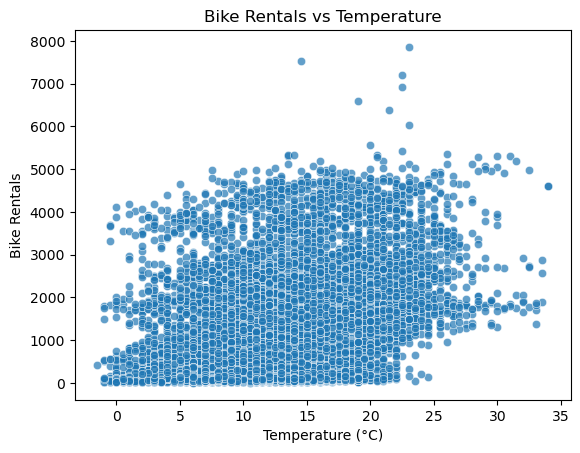

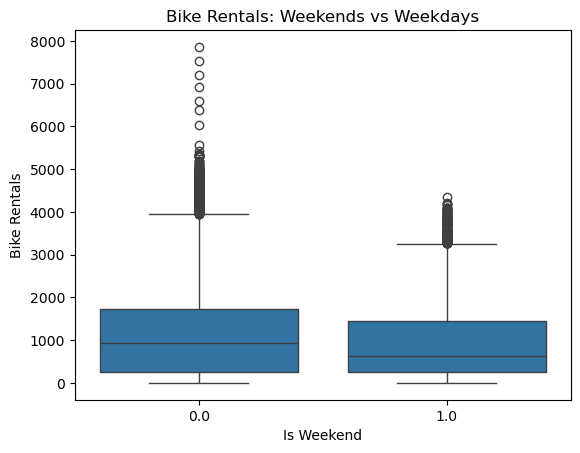

In [8]:
# Relationship between temperature and bike rentals
sns.scatterplot(x='t1', y='cnt', data=df, alpha=0.7)
plt.title("Bike Rentals vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike Rentals")
plt.show()

# Rentals on weekends vs weekdays
sns.boxplot(x='is_weekend', y='cnt', data=df)
plt.title("Bike Rentals: Weekends vs Weekdays")
plt.xlabel("Is Weekend")
plt.ylabel("Bike Rentals")
plt.show()
